# Game of Life

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
from functional_abm.schedulers.step_based import StepBasedScheduler
from functional_abm.agent import agent

In [3]:
ARRAY_SIZE = 100

In [4]:
foo = np.zeros((ARRAY_SIZE, ARRAY_SIZE))

In [5]:
foo[1:ARRAY_SIZE-1, 1:ARRAY_SIZE-1] = np.random.randint(0,2, (ARRAY_SIZE-2, ARRAY_SIZE-2))

In [6]:
def gol(steps, initial_state):
    
    scheduler = StepBasedScheduler(steps)
    
    history = []
    
    @agent(scheduler=scheduler)
    def cell(t, antecedents, state, descendants):
        
        live_neighbours = np.sum(antecedents) - antecedents[1,1]
        
        if live_neighbours < 2:
            new_state = 0
        elif live_neighbours == 2:
            new_state = state[0,0]
        elif live_neighbours == 3:
            new_state = 1
        elif live_neighbours > 3:
            new_state = 0
        
        state[0:1,0:1] = new_state
        
        return t + 1
            
    for i in range(1, initial_state.shape[0]-1):
        for j in range(1, initial_state.shape[1]-1):
            cell(0, 
                 initial_state[i-1: i+2, j-1: j+2],
                 initial_state[i:i+1, j:j+1],
                 {}
                )
    
    while not scheduler.finished:
        history.append(initial_state.copy())
        scheduler.step()
        
    return history

In [7]:
state_series = gol(10, foo)

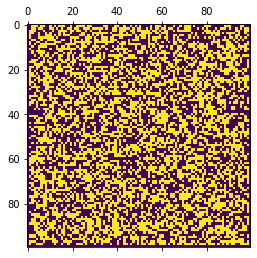

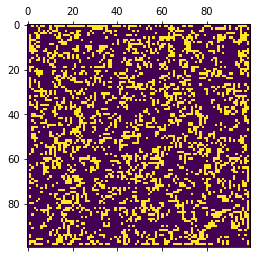

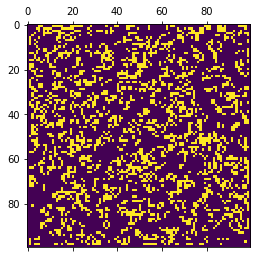

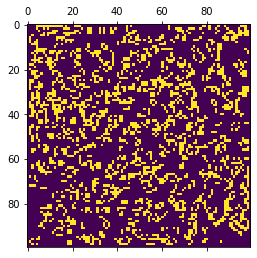

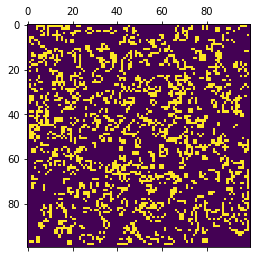

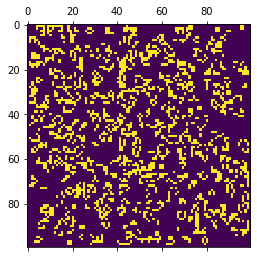

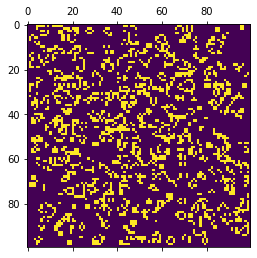

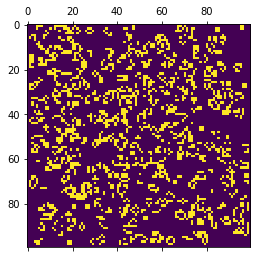

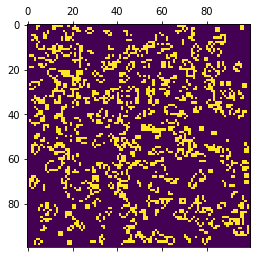

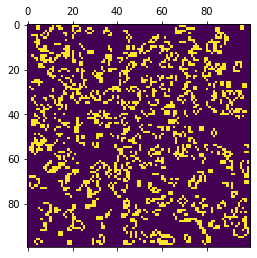

In [8]:
for i in range(len(state_series)):
    plt.matshow(state_series[i]);